In [186]:
#Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score,confusion_matrix,recall_score

#### Importando o dataset

In [187]:
df = pd.read_csv('sao-paulo-properties-april-2019.csv')
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


# Descrição sucinta do problema e da base de dados

##  Qual o problema a ser resolvido?

### O problema a ser resolvido trata-se da previsão de custo do alguel ou venda de imóveis no estado de São Paulo.

##  O que significa cada instância do dataset?

#### Price: Preço final do imóvel
#### Condo: Despesas do condomínio
#### Size: O tamanho da propriedade em metros quadrados m²
#### Rooms: Número de quartos
#### Toilets: Número de banheiros
#### Suites: Número de quartos com casa de banho privada
#### Parking: Número de vagas no estacionamento
#### Elevator: Valor binário: 1 se houver elevador no edifício, 0 caso contrário
#### Furnished: Valor binário: 1 se a propriedade for mobiliado, 0 caso contrário
#### Swimming Pool: Valor binário: 1 se a propriedade tiver piscina, 0 caso contrário
#### New: Valor binário: 1 se a propriedade for muito recente, 0 caso contrário
#### District: O bairro e a cidade onde o imóvel está localizado, ex.: Itaim Bibi/São Paulo
#### Negotiation Type: Venda ou Aluguel
#### Property Type: 
#### Latitude: O tipo de propriedade
#### Longitude: Localização geográfica


##  Quais são os principais atributos e seus tipos?

In [188]:
#Informaçõesa respeito dos atributos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

#### A maioria das features são numéricas, apenas District, Negotiation Type e Property Type são categóricas

#### Além disso, não há valores nulos

### 

# Análise Exploratória de Dados

## Como cada variável se distribui?

In [189]:
# Distribuição geral dos dados
for col in df.columns:
    print(f'-------Distribuição de {col}------')
    print(df[f'{col}'].describe())
    print(df.groupby([f'{col}']).size())
    print('\n')

-------Distribuição de Price------
count    1.364000e+04
mean     2.877378e+05
std      5.908214e+05
min      4.800000e+02
25%      1.858750e+03
50%      8.100000e+03
75%      3.600000e+05
max      1.000000e+07
Name: Price, dtype: float64
Price
480         1
500         5
550         1
600         7
610         1
           ..
8000000     2
8039200     1
8500000     1
9979947     1
10000000    1
Length: 1881, dtype: int64


-------Distribuição de Condo------
count    13640.000000
mean       689.882331
std        757.649363
min          0.000000
25%        290.000000
50%        500.000000
75%        835.000000
max       9500.000000
Name: Condo, dtype: float64
Condo
0       1977
1         27
3          1
6          1
10         4
        ... 
8000       1
8800       1
8860       1
8920       1
9500       1
Length: 1415, dtype: int64


-------Distribuição de Size------
count    13640.000000
mean        84.373900
std         58.435676
min         30.000000
25%         50.000000
50%        

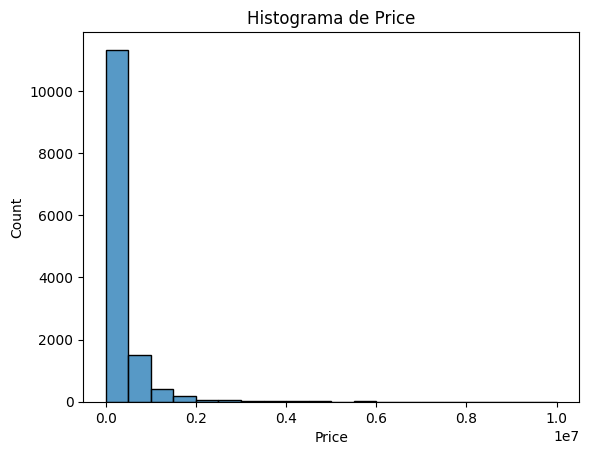

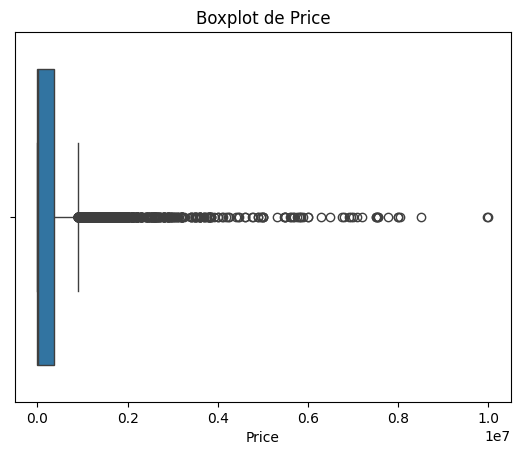

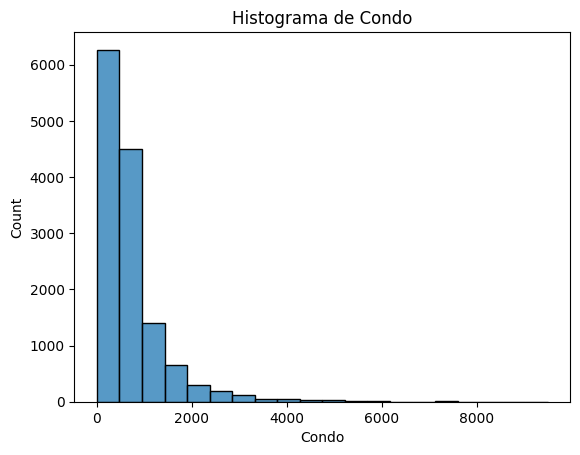

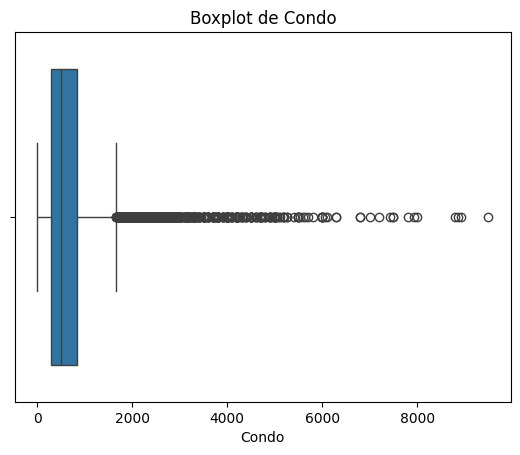

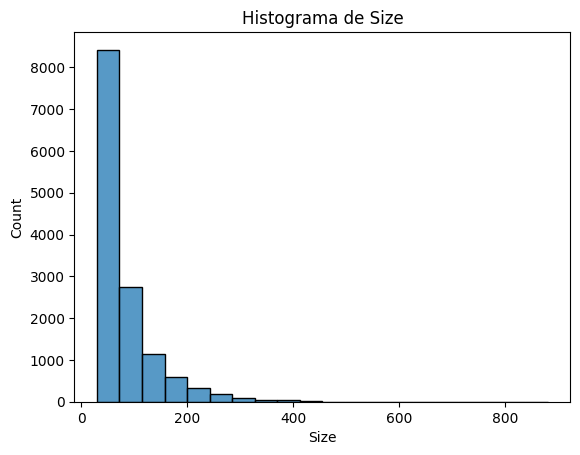

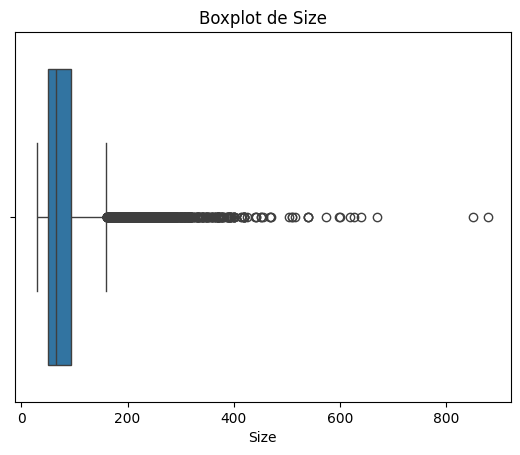

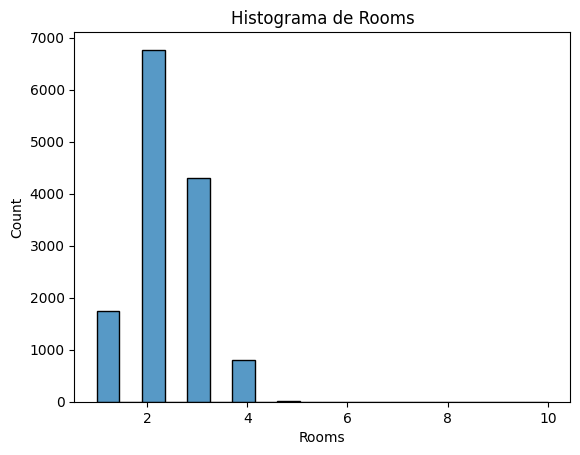

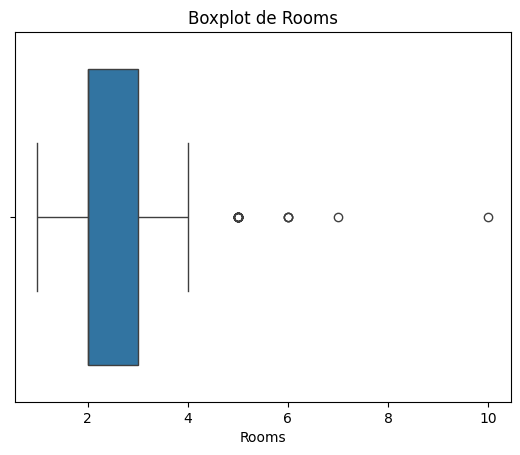

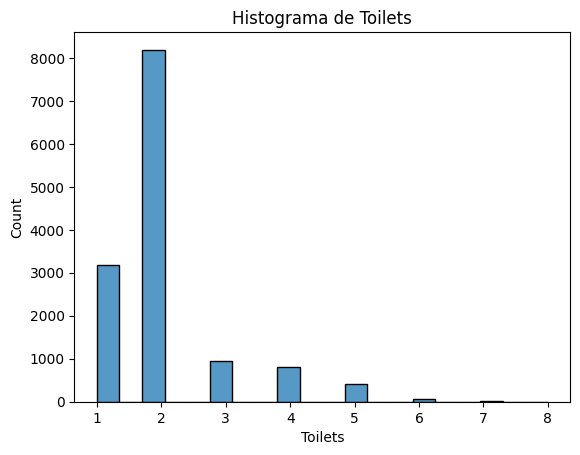

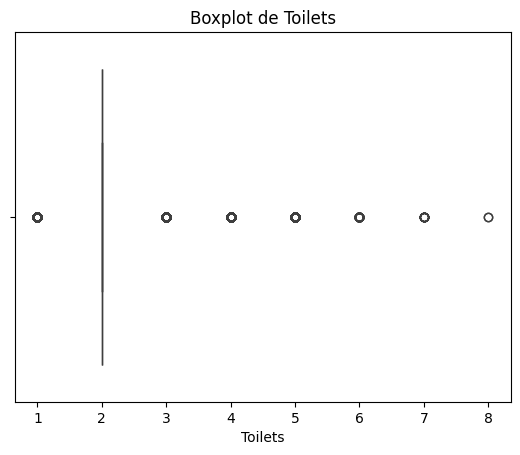

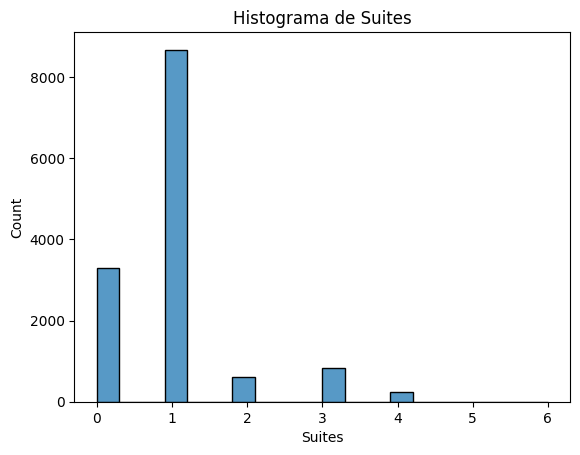

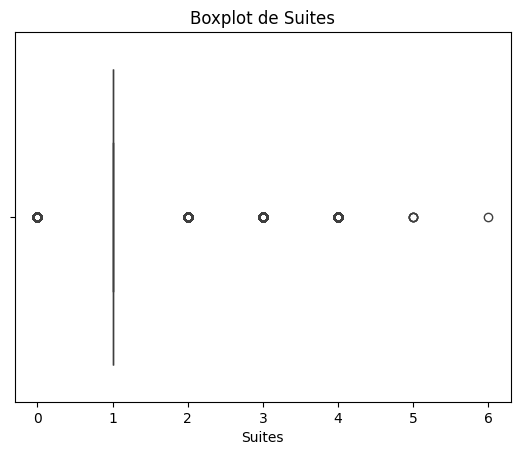

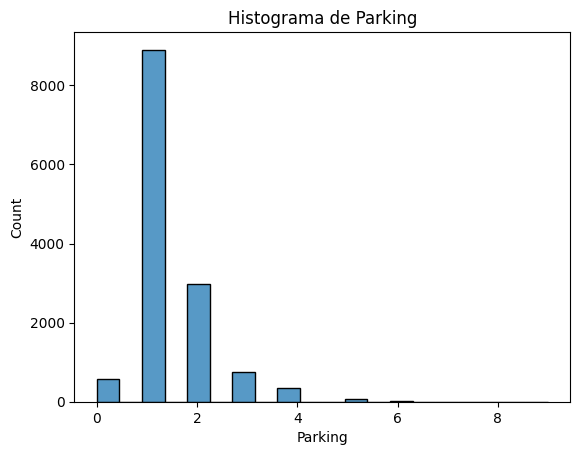

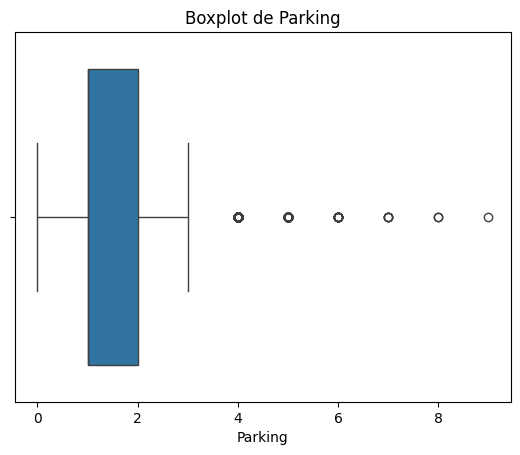

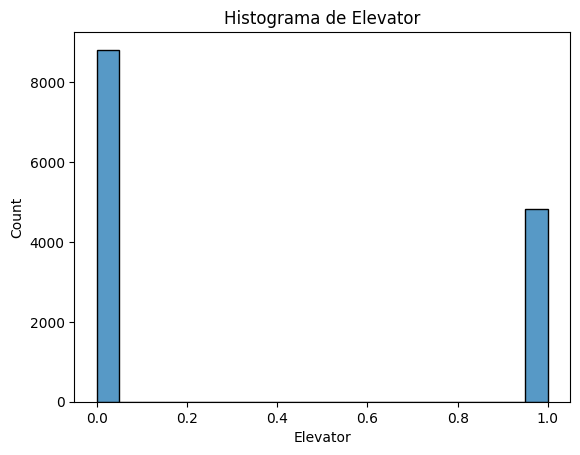

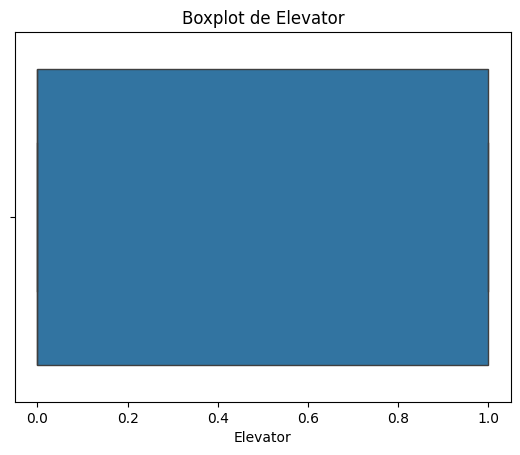

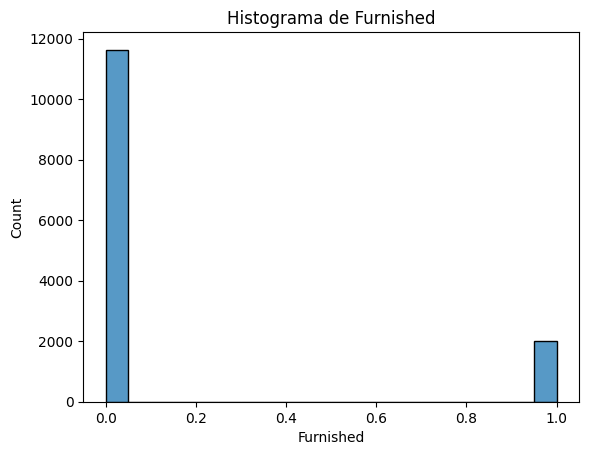

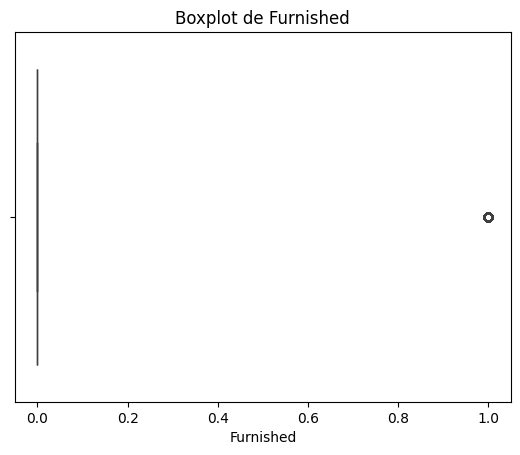

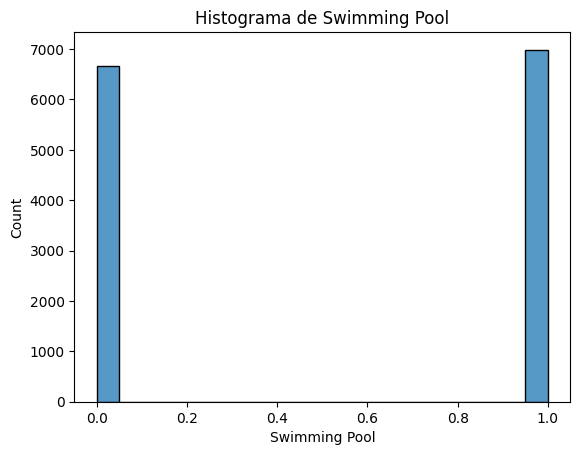

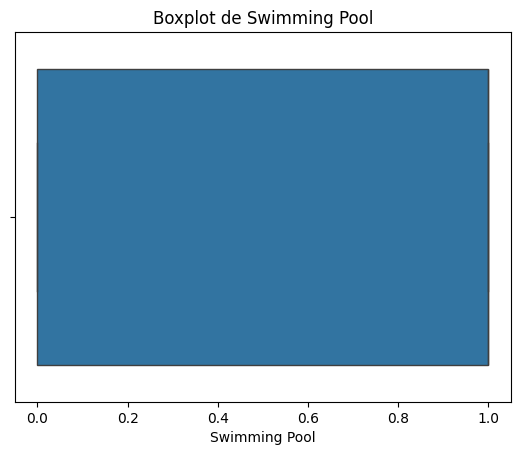

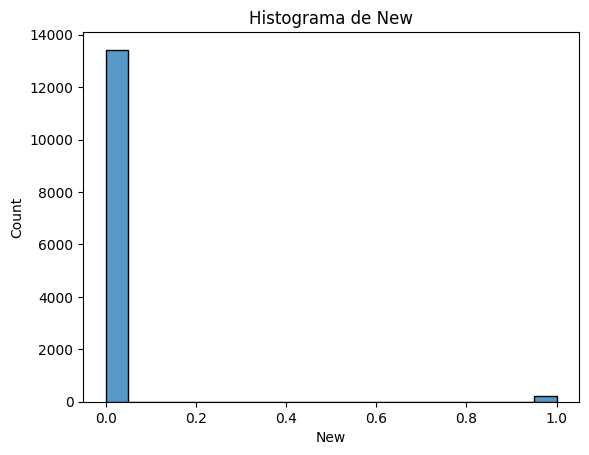

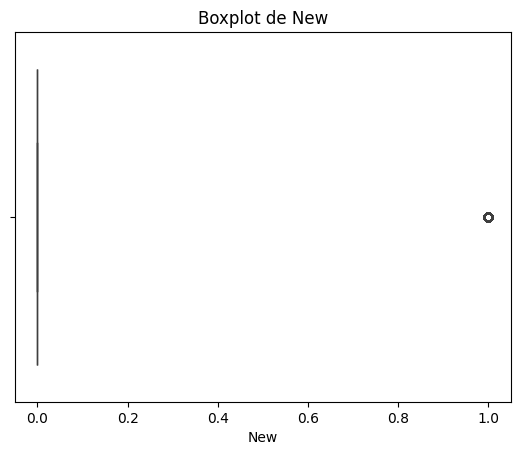

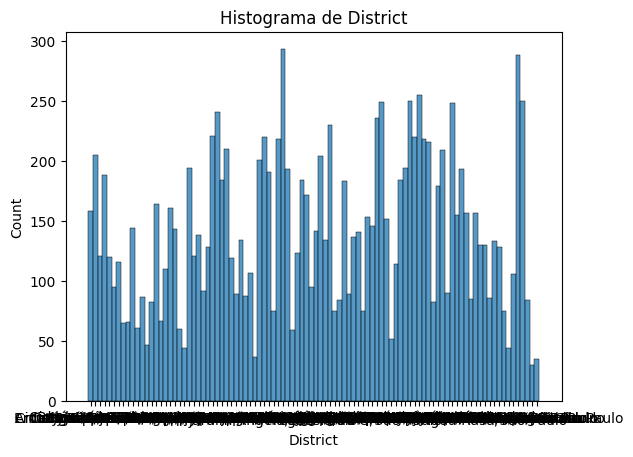

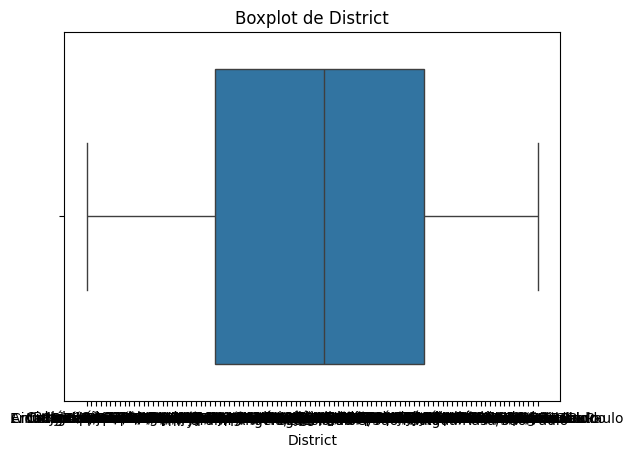

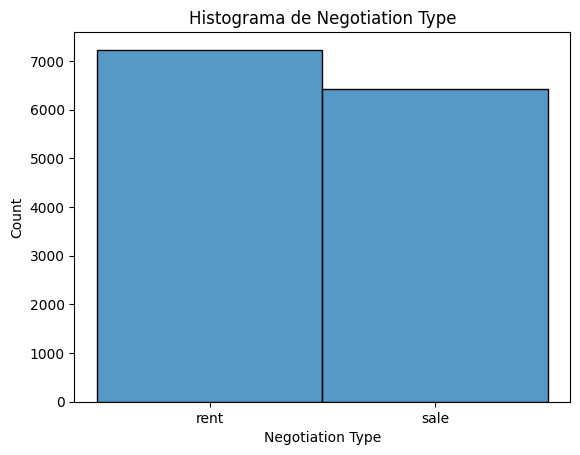

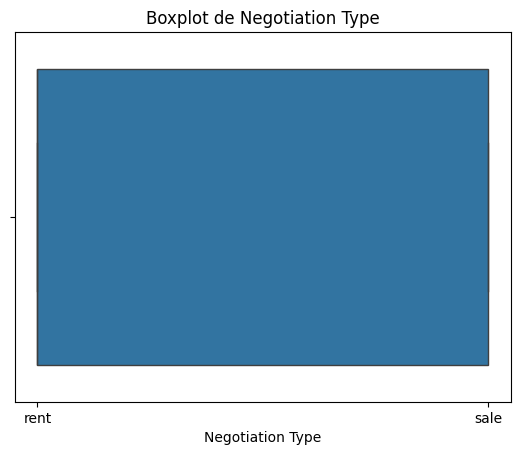

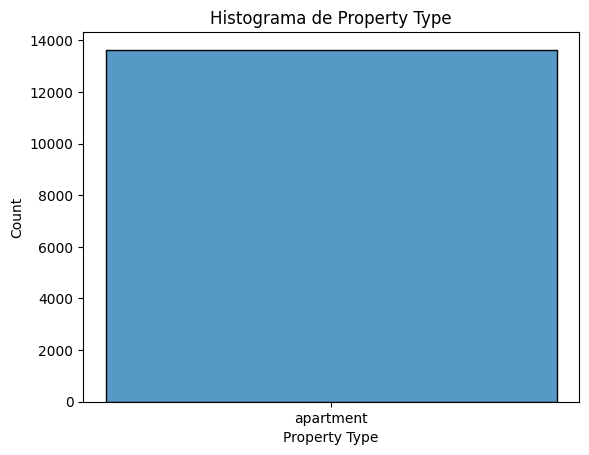

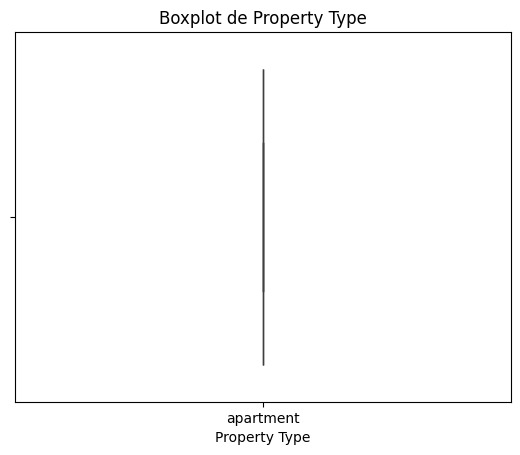

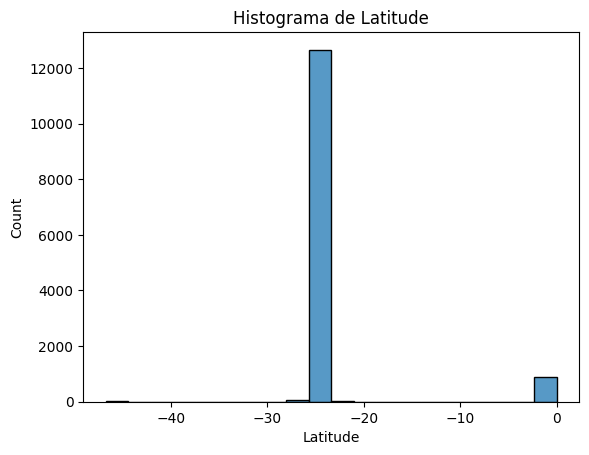

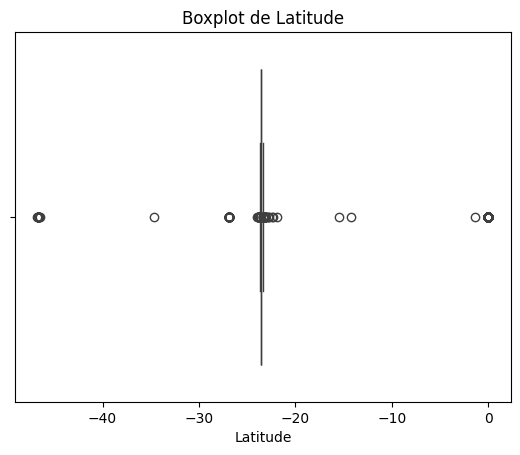

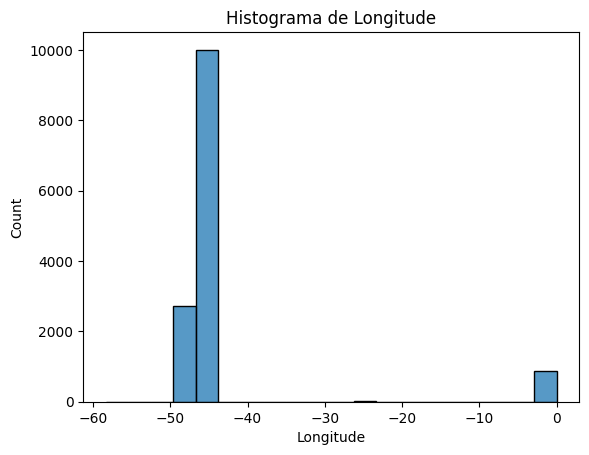

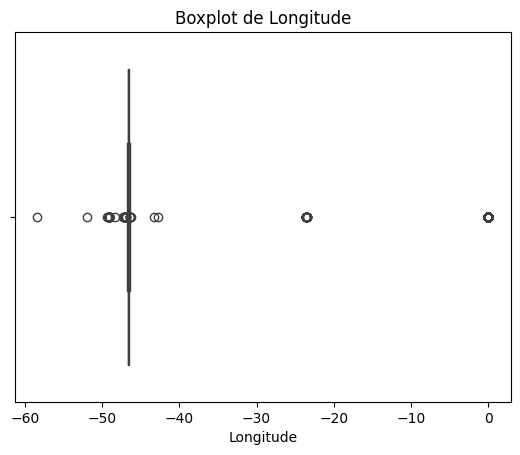

In [190]:
#Distribuição visual dos dados por coluna

for col in df.columns:
    plt.title(f'Histograma de {col}')
    sns.histplot(data=df,x=f'{col}',bins=20)
    plt.show()

    plt.title(f'Boxplot de {col}')
    sns.boxplot(data=df,x=f'{col}')
    plt.show()

## Correlação de variáveis

In [191]:
#Primeiro é necessário transformar as variáveis categóricas em numéricas, portanto será utilizando o LabelEncoder

df_corr = df.copy()

columns = ['District','Negotiation Type','Property Type']

label_encoders = {}

for col in columns:
    label_encoder = LabelEncoder()
    df_corr[col] = label_encoder.fit_transform(df_corr[col])
    label_encoders[col] = label_encoder

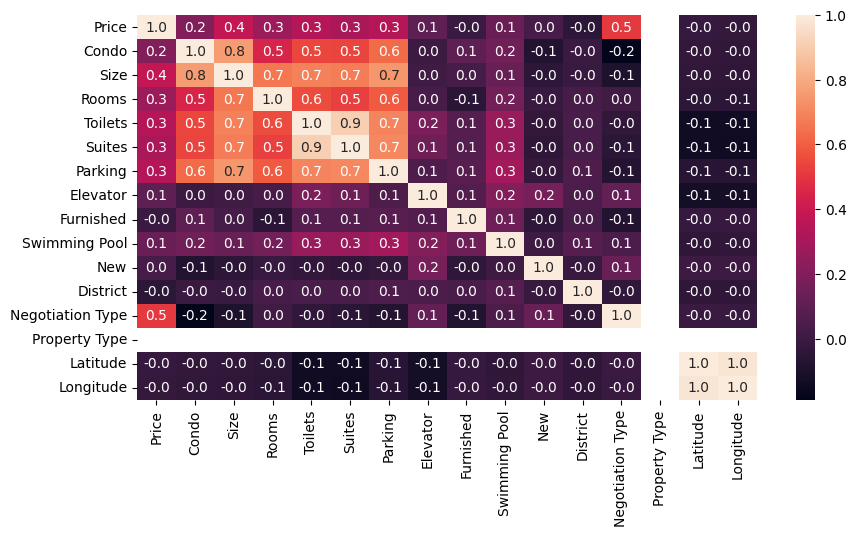

In [192]:
correlacao = df_corr.corr()

plt.figure(figsize=(10,5))
sns.heatmap(data=correlacao,annot=True,fmt='.1f')
plt.show()

## Gráficos que gerem insights para o tratamento de dados e/ou treinamento dos modelos:

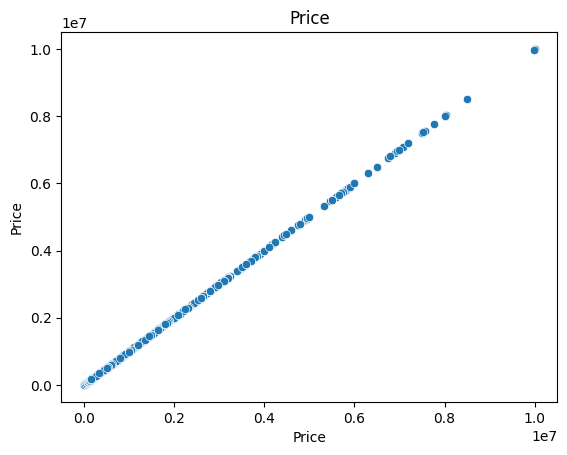

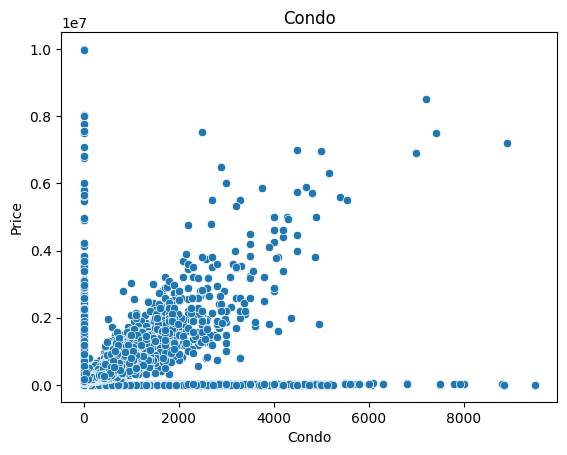

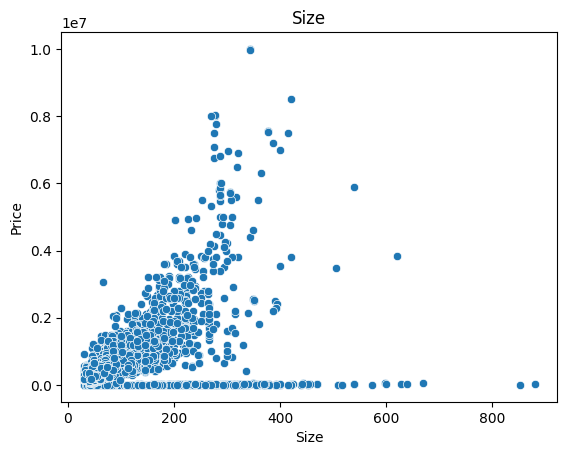

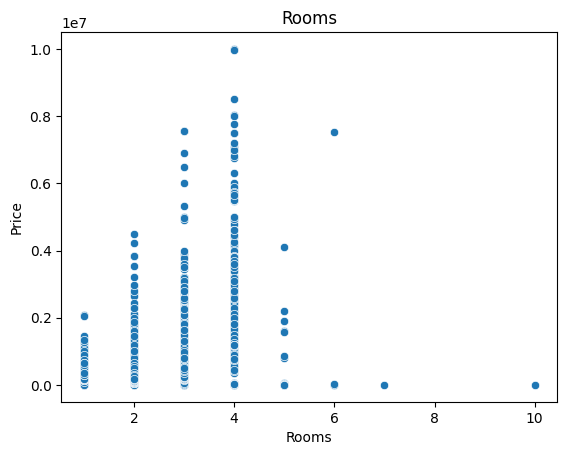

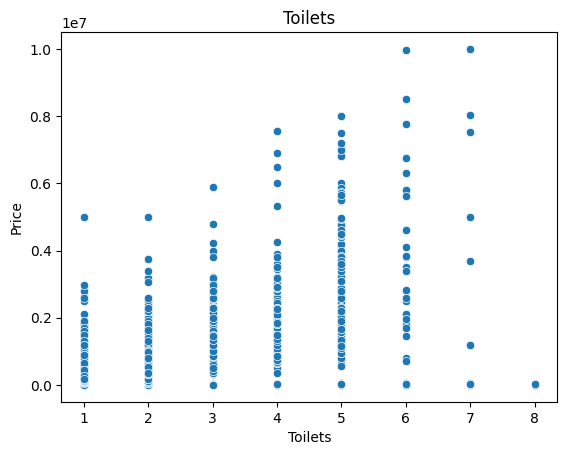

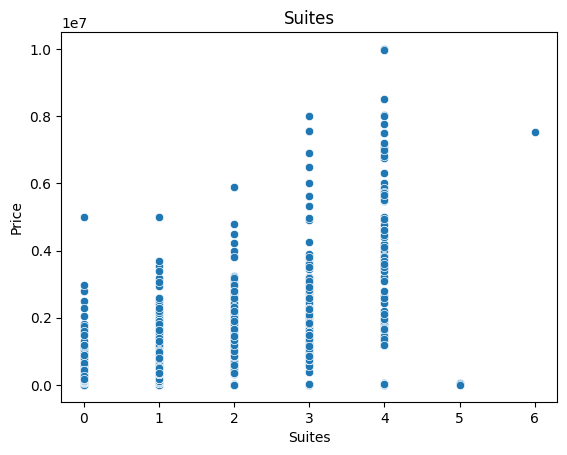

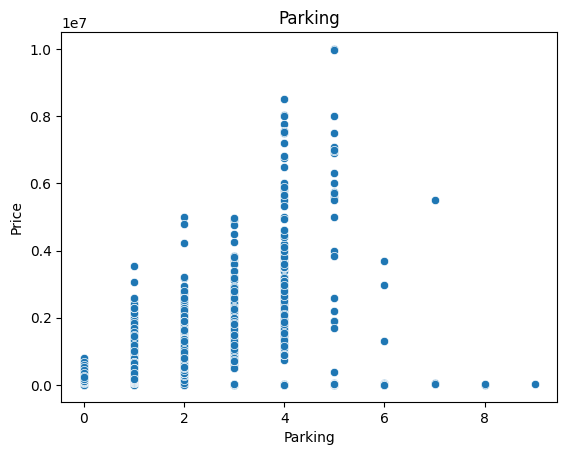

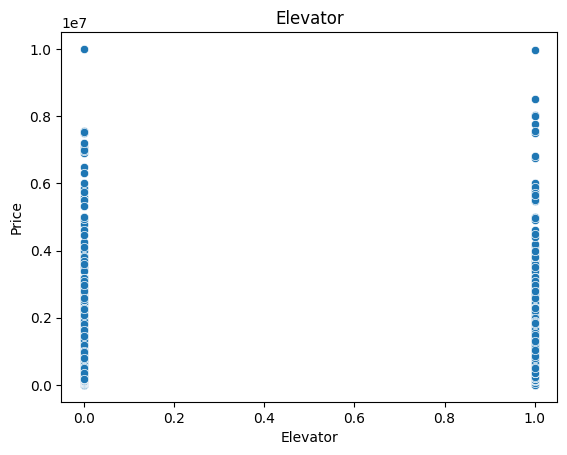

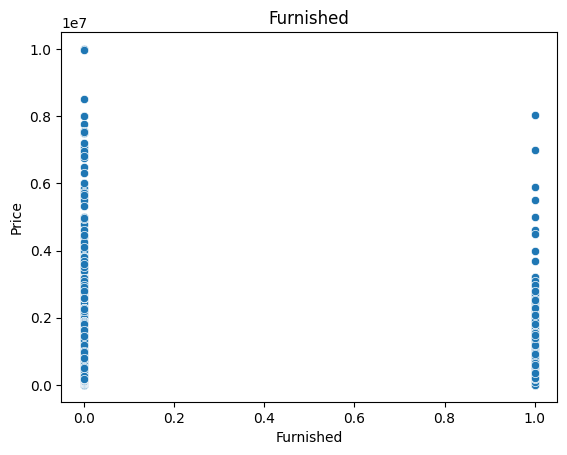

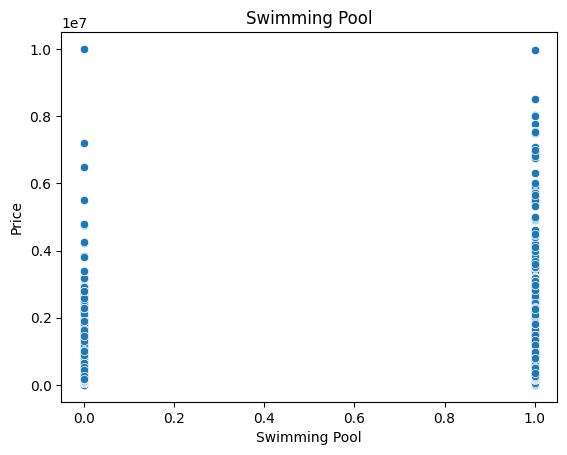

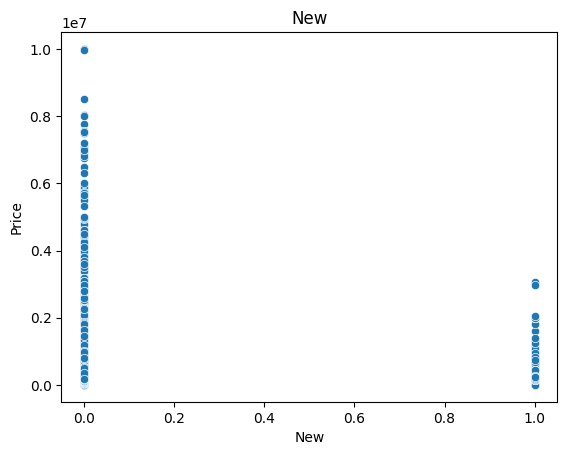

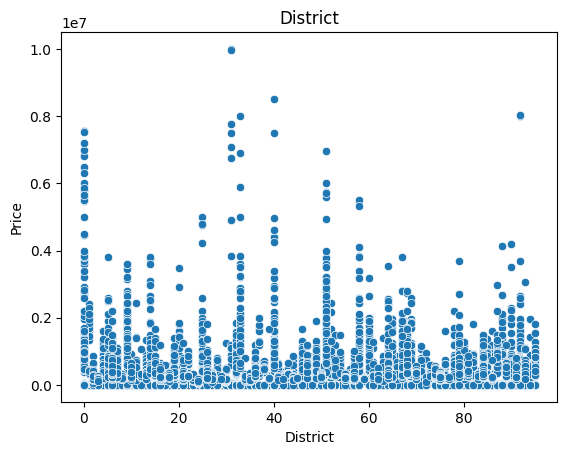

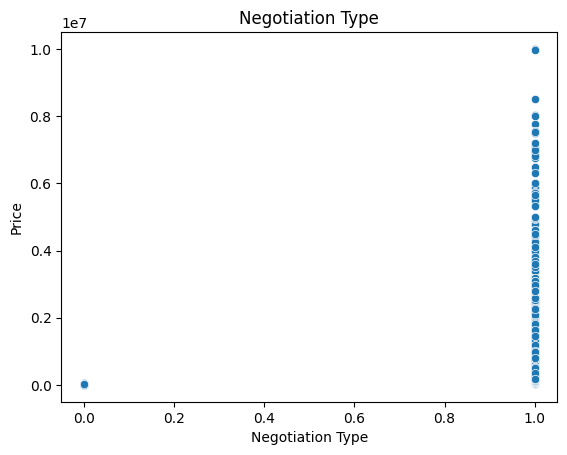

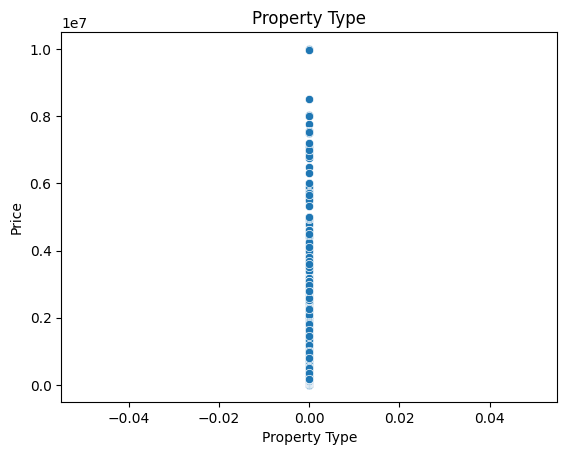

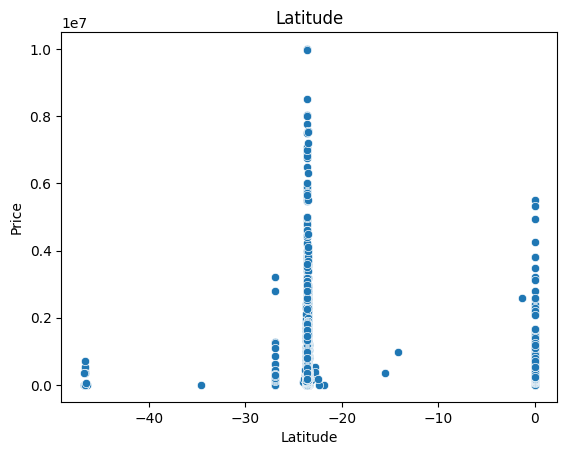

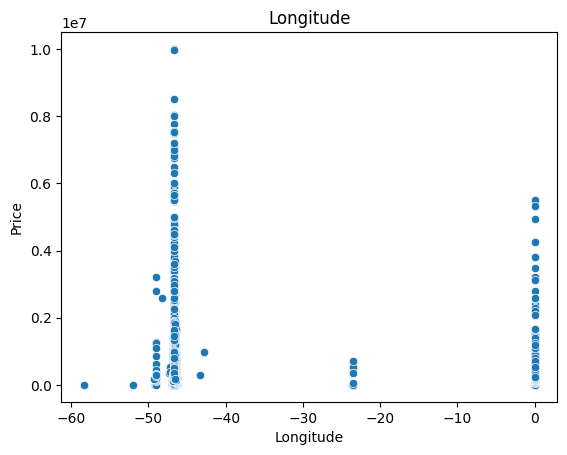

In [193]:
for col in df_corr.columns:
    plt.title(f'{col}')
    sns.scatterplot(data=df_corr,x=f'{col}',y='Price')
    plt.show()

## Discussão dos principais achados da análise exploratória de dados;


- Devido se tratar de dados apenas de São Paulo, a longitude e latitude tendem a conscentra-se. Além de existir dados fora da localidade de SP.
- O único tipo de propriedade é apartamento, portando é irrelevante para o modelo.
- A maioria dos imóveis não são mobiliados.
- O tamanho do apartamento, custo do condomínio, quantidade de quartos, banheiros, suites e estacionamento possuem correlação igual ou superior a moderada.
- Existem apartamento praticamente de graça com valores de condomínio muito elevados.
- Existem apartamentos grandes com preços baixíssimos quando comparados aos seu semelhantes.

# Limpeza e preparação da base de dados

In [194]:
df_clean = df_corr.copy()
df_clean.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,3,0,0,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,3,0,0,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,3,0,0,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,3,0,0,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,3,0,0,-23.525025,-46.482436


## Remoção de duplicidade


In [195]:
# Removendo linhas duplicadas
df_clean = df_clean.drop_duplicates()
df_clean.shape

(13321, 16)

## Remoção de Outliers

In [196]:
#Tratamento de outliers
def limit_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_sem_outliers = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

    return df_sem_outliers

In [197]:
# A remoção dos outliers da latitude e longitude, pois existem localidade fora do estado de SP
cols = ['Latitude','Longitude']
for col in cols:
    df_clean = limit_outliers(df_clean,f'{col}')


# Como se trata de apenas do Estado de São Paulo, não há a necessidade da localidade ser muito específica, portanto será utilizado apenas o Distric, portanto:
df_clean = df_clean.drop(columns=['Latitude','Longitude'])

In [198]:
# Investigando apartamento grandes (considerados aqui como >=100m²) com baixo valor
 
df_apto = df_clean.copy()
df_apto = df_apto.loc[(df_apto['Size']>=25)]

df_apto['Price'].describe(percentiles=[0.005, .01, .025, .05, .10, .20, .30, .40, .50, .60, .70, .80, .90])

count    1.178200e+04
mean     3.019294e+05
std      6.124806e+05
min      4.800000e+02
0.5%     7.900000e+02
1%       8.500000e+02
2.5%     1.000000e+03
5%       1.100000e+03
10%      1.300000e+03
20%      1.600000e+03
30%      2.200000e+03
40%      3.300000e+03
50%      7.600000e+03
60%      2.290000e+05
70%      3.250000e+05
80%      4.750000e+05
90%      7.800000e+05
max      1.000000e+07
Name: Price, dtype: float64

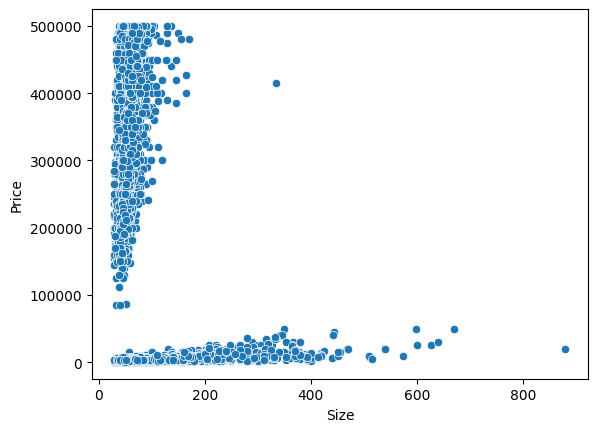

In [199]:
# Verificando os apartamentos grande com preço inferior a 1kk reais
df_apto_view = df_apto.copy()
df_apto_view = df_apto_view.loc[df_apto_view['Price']<=500000]

sns.scatterplot(data=df_apto_view,x='Size',y='Price')
plt.show()

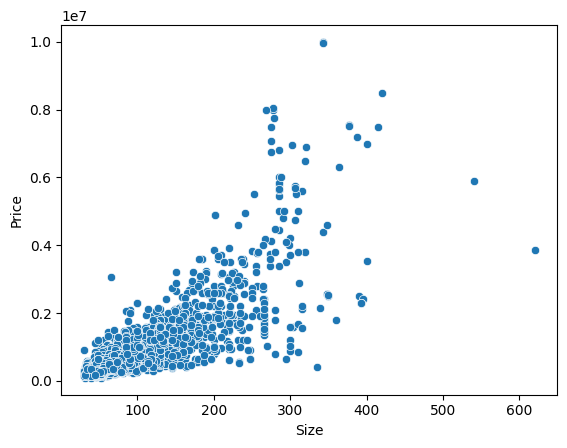

In [200]:
# Os apartamentocom preço inferior a 50Mil reais serão elimnados, visto que não faz sentido quando comparados ao demais dados

df_clean = df_clean[((df_clean['Size']>=0) & (df_clean['Price']<=50000))==False]

sns.scatterplot(data=df_clean,x='Size',y='Price')
plt.show()

In [201]:
# Investigando os apartamentos baratos com alto custo de condomínio (>=R$500)

 
df_condo = df_clean.copy()
df_condo = df_condo.loc[(df_condo['Condo']>=500)]

df_condo['Price'].describe(percentiles=[0.005, .01, .025, .05, .10, .20, .30, .40, .50, .60, .70, .80, .90])

count    2.399000e+03
mean     9.013726e+05
std      8.002729e+05
min      1.500000e+05
0.5%     2.299700e+05
1%       2.459800e+05
2.5%     2.700000e+05
5%       3.000000e+05
10%      3.496400e+05
20%      4.246000e+05
30%      4.999396e+05
40%      5.850000e+05
50%      6.730000e+05
60%      7.600000e+05
70%      9.199960e+05
80%      1.200000e+06
90%      1.644400e+06
max      8.500000e+06
Name: Price, dtype: float64

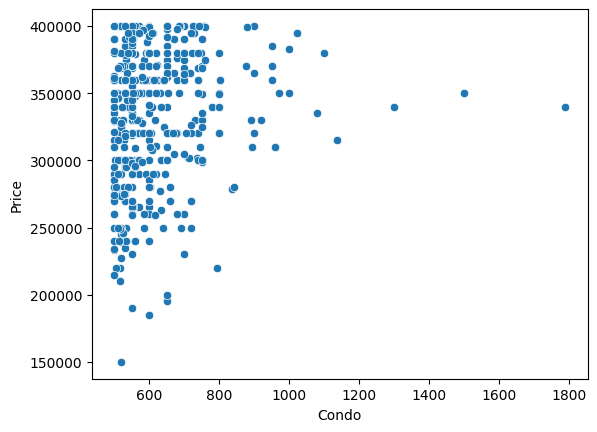

In [202]:
# Verificando os condomínios caros com preço inferior a 400000 reais
df_condo_view = df_condo.copy()
df_condo_view = df_condo_view.loc[df_condo_view['Price']<=400000]

sns.scatterplot(data=df_condo_view,x='Condo',y='Price')
plt.show()

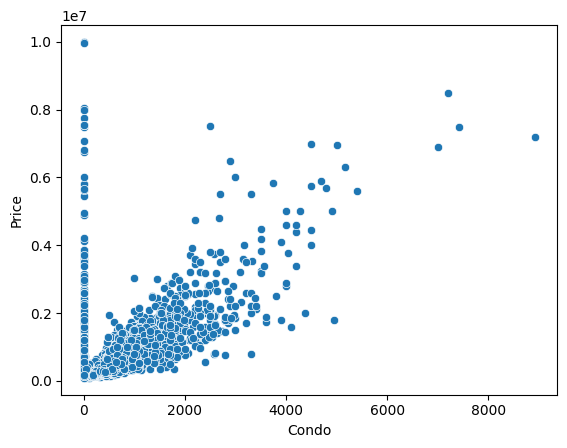

In [203]:
# Os apartamento com preço inferior a 50Mil reais serão elimnados, visto que não faz sentido quando comparados ao demais dados

df_clean = df_clean[((df_clean['Condo']>=0) & (df_clean['Price']<=50000))==False]

sns.scatterplot(data=df_clean,x='Condo',y='Price')
plt.show()

In [204]:
# Quanto mais caro um apartamento é mais provável que haja condomínio, visto o alto valor dos bens. 
# Pessoas com maior poder aquisitivo conseguem pagar por isso, portanto não faz sentido não haver custo do condomínio

# Portanto serão eliminados

# Verificando os apartamentos caros sem condomínio 
df_condo = df_clean.copy()
df_condo = df_condo.loc[(df_condo['Condo']<=500)]

df_condo['Price'].describe(percentiles=[0.005, .01, .025, .05, .10, .20, .30, .40, .50, .60, .70, .80, .90])

count    3.154000e+03
mean     4.522023e+05
std      6.641883e+05
min      8.500000e+04
0.5%     1.465300e+05
1%       1.500000e+05
2.5%     1.650000e+05
5%       1.790000e+05
10%      1.950000e+05
20%      2.200000e+05
30%      2.429998e+05
40%      2.732000e+05
50%      3.090000e+05
60%      3.488000e+05
70%      3.940000e+05
80%      4.770000e+05
90%      6.827300e+05
max      1.000000e+07
Name: Price, dtype: float64

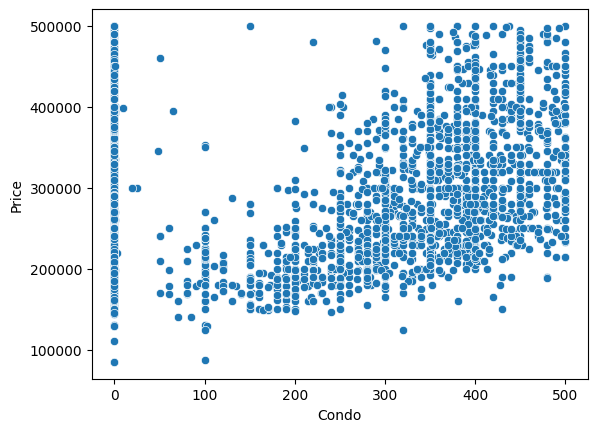

In [205]:
# Verificando os condomínios baratos com preço alto
df_condo_view = df_condo.copy()
df_condo_view = df_condo_view.loc[df_condo_view['Price']<=500000]

sns.scatterplot(data=df_condo_view,x='Condo',y='Price')
plt.show()

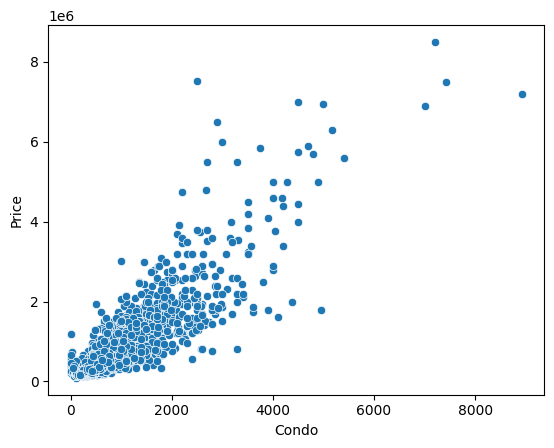

In [206]:
# Os apartamento com condomínio igual a 0 serão eliminados, visto que não faz sentido quando comparados ao demais dados

df_clean = df_clean[df_clean['Condo']>0]

sns.scatterplot(data=df_clean,x='Condo',y='Price')
plt.show()

In [207]:
# A coluna Property Type possui apenas um valor, portanto será excluída

df_clean = df_clean.drop(columns=['Property Type'])


In [208]:
# Realizando Feature Scaling nas colunas com altos valores

columns = ['Condo','Size']

standard_scalers = {}

for col in columns:
    scaler = StandardScaler()
    df_clean[col] = scaler.fit_transform(df_clean[[col]])
    standard_scalers[col] = scaler   

In [211]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4318 entries, 4901 to 13638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             4318 non-null   int64  
 1   Condo             4318 non-null   float64
 2   Size              4318 non-null   float64
 3   Rooms             4318 non-null   int64  
 4   Toilets           4318 non-null   int64  
 5   Suites            4318 non-null   int64  
 6   Parking           4318 non-null   int64  
 7   Elevator          4318 non-null   int64  
 8   Furnished         4318 non-null   int64  
 9   Swimming Pool     4318 non-null   int64  
 10  New               4318 non-null   int64  
 11  District          4318 non-null   int32  
 12  Negotiation Type  4318 non-null   int32  
dtypes: float64(2), int32(2), int64(9)
memory usage: 438.5 KB


# Treinamento e Validação de modelos de regressão